In [ ]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

%matplotlib inline

## ДИ в нормальной модели
 В данном задании вам нужно изучить доверительные интервалы для параметра сдвига в нормальной модели в случае неизвестной дисперсии. Требуется построить: 
 * асимтотический доверительный интервал при помощи центральной предельной теоремы;
 * точный неасимптотический при помощи распределений хи-квадрат, Стьюдента.

Вывод этих интервалов был разобран на лекции. Выпишите только ответы.

Асимптотический доверительный интервал: $$\left(\overline{X} - z_{\frac{1+\alpha}{2}}\frac{\sigma}{\sqrt{n}}, \overline{X} + z_{\frac{1+\alpha}{2}}\frac{\sigma}{\sqrt{n}}\right)$$

Точный доверительный интервал: $$\left(\overline{X} - t_{n-1,\frac{1+\alpha}{2}}\frac{S}{\sqrt{n-1}}, \overline{X} + t_{n-1,\frac{1+\alpha}{2}}\frac{S}{\sqrt{n-1}}\right)$$

Реализуйте функции построения этих интервалов по выборке. Функции уже задокументированы.

Интервалы считайте по префиксам. Циклы использовать **запрещено**. Для подсчета среднего по префиксам используйте функцию `np.cumsum`.

In [ ]:
def calculate_asymptotic_confidence_intervals(sample, alpha=0.95):
    '''
    Функция для вычисления асимптотического доверительного интервала
    param sample: выборка,
    param alpha: уровень доверия

    return: асимптотический доверительный интервал
    '''
    count = len(sample)
    X_av = np.cumsum(sample) / (np.arange(count) + 1)
    sigma = np.sqrt(np.cumsum((sample-X_av)**2) / (np.arange(1, count+1)))
    z = sps.norm.ppf((1 + alpha) / 2)
    low_qw = X_av - z * (sigma / np.sqrt(count))
    high_qw = X_av  + z * (sigma / np.sqrt(count))
    return np.column_stack((low_qw, high_qw))
    


def calculate_confidence_intervals(sample, alpha=0.95):
    '''
    Функция для вычисления неасимптотического доверительного интервала
    param sample: выборка,
    param alpha: уровень доверия

    return: неасимптотический доверительный интервал
    '''
    count = len(sample)
    X_av = np.cumsum(sample) / (np.arange(count) + 1)
    S = np.sqrt(np.cumsum((sample-X_av)**2) / (np.arange(1, count+1) - 1))
    t = sps.t.ppf((1 + alpha) / 2, count-1)
    low_qw = X_av - t * (S / np.sqrt(np.arange(1, count+1) - 1))
    high_qw = X_av  + t * (S / np.sqrt(np.arange(1, count+1) - 1))
    return np.column_stack((low_qw, high_qw))

Сгенерируйте выборку из нормального расределения и сравните два доверительных интервала в зависимости от размера выборки. Для сравнения отобразите оба интервала на одном графике. Проследите за тем, чтобы было видно, как соотносятся размеры интервалов. Поясните теоретическую причину такого поведения доверительных интервалов.

*Указание*: рассматривайте длину выборки около 20-30.

Чтобы не плодить код, допишите следующую функцию (см. ниже). При выборе стиля графика помните, что если изображаются лишь точки и линии, то лучше использовать серый фон, а если присутствуют закрашенные области, то предпочтительнее белый. Графики первого типа еще называют "легкими", а второго — "тяжелыми".

*Подсказка:* вам может пригодиться функция `plt.fill_between`.

$$s = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2}$$

In [ ]:
def draw_confidence_interval(
    left, right, estimation=None, sample=None, 
    ylim=(None, None), color_estimation='#FF3300', color_interval='#00CC66', 
    color_sample='#0066FF', label_estimation='Оценка'
):
    '''
    Рисует доверительный интервал и оценку в зависимости от размера выборки.
    
    :param left: левые границы интервалов (в зависимости от n)
    :param right: правые границы интервалов (в зависимости от n)
    :param estimation: оценки (в зависимости от n)
    :param sample: выборка
    :param ylim: ограничение вертикальной оси
    :param color_estimation: цвет оценки
    :param color_interval: цвет интервала
    :param color_sample: цвет выборки
    :param label_estimation: подпись для оценки
    '''
    
    time = np.arange(len(left)) + 1
    
    assert len(time) == len(right)
    
    plt.figure(figsize=(10,7))

    plt.fill_between(time, left, right, color=color_interval, alpha=0.5, label='доверительный интервал')


    if estimation is not None:
      plt.plot(time, estimation, color=color_estimation, label=label_estimation)

    if sample is not None:
      plt.scatter(time, sample, color=color_sample, alpha=0.5, label='выборка')

    
    plt.legend(fontsize=16)
    plt.ylim(ylim) 
    plt.xlabel('Размер выборки', fontsize=16)
    plt.title(label = label_estimation, fontsize=20)
    plt.grid();

<ipython-input-35-c88027711952>:29: RuntimeWarning: invalid value encountered in true_divide
  S = np.sqrt(np.cumsum((sample-X_av)**2) / (np.arange(1, count+1) - 1))


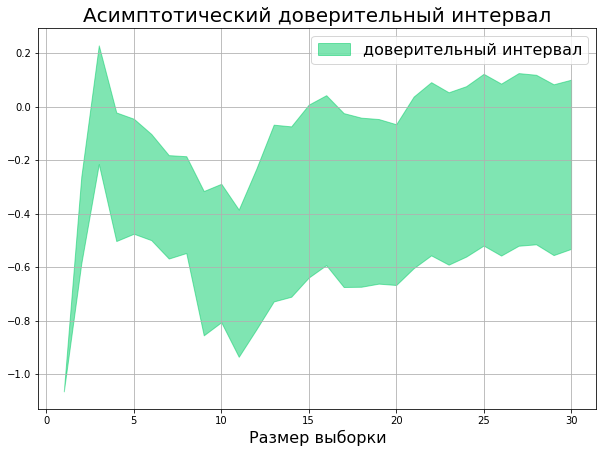

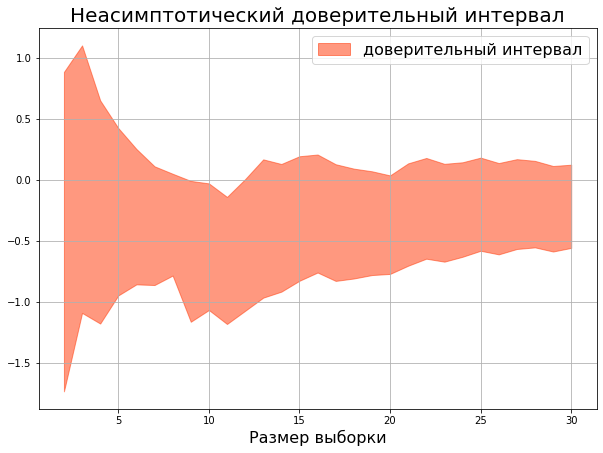

In [ ]:
sample = np.random.normal(loc=0, scale=1, size=30)
asymptotic_interval = calculate_asymptotic_confidence_intervals(sample)
interval = calculate_confidence_intervals(sample)


draw_confidence_interval(asymptotic_interval[:, 0], asymptotic_interval[:, 1], color_interval='#00CC66', label_estimation='Асимптотический доверительный интервал')
draw_confidence_interval(interval[:, 0], interval[:, 1], color_interval='#FF3300', label_estimation='Неасимптотический доверительный интервал')

plt.show();

**Вывод:** АДИ вычисляется с использованием ЦПТ n -> ∞, ТДИ лучше подходит для выборок малого размера. Поэтому можно ожидать, что асимптотический доверительный интервал будет короче неасимптотического интервала при малых размерах выборки, а затем они будут приблизительно равны при увеличении размера выборки. Это можно увидеть на графике.

Также можно заметить, что интервалы уменьшаются при увеличении размера выборки, что отражает более точные оценки параметров распределения при увеличении размера выборки.